In [2]:
import pandas as pd 
import seaborn as sns
sns.set()
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans


In [3]:
data = pd.read_csv('3.12. Example.csv')


In [4]:
data 

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


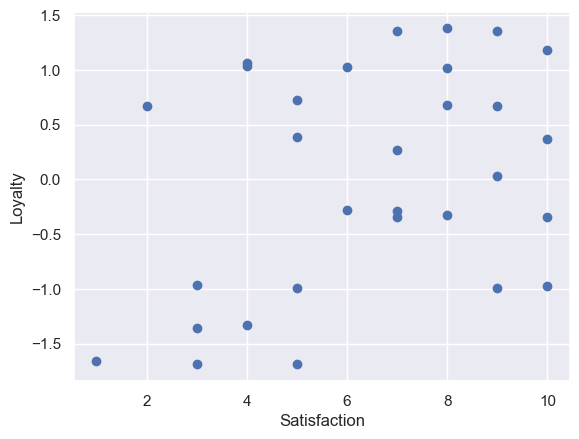

In [6]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [7]:
x = data.copy()


## Clustering

In [9]:
 
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results 

In [11]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)
clusters

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


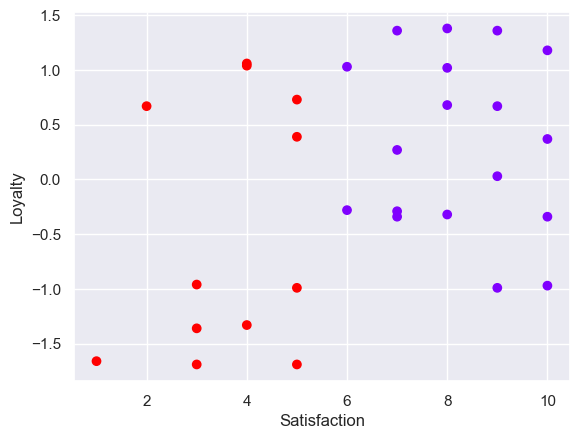

In [12]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Standardazing

In [14]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

In [ ]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [19]:
data_scaled = pd.DataFrame(x_scaled)
data_scaled.columns =['Satisfaction','Loyalty']
data_scaled

,Satisfaction,Loyalty
0,-0.931381,-1.331811
1,-0.155230,-0.281171
2,-0.543305,-0.991604
3,0.232845,-0.291177
4,-0.931381,1.059645
5,-2.095606,-1.662012
6,1.397071,-0.971592
7,0.620920,-0.321196
8,0.620920,1.019621
9,0.620920,0.679414


In [23]:
wcss =[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(data_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[60.0,
 30.352360588087745,
 18.129659446063222,
 10.24718180592842,
 9.415374940973663,
 6.847135761731639,
 5.985258413019114,
 4.954391059301123,
 4.028943570332416]

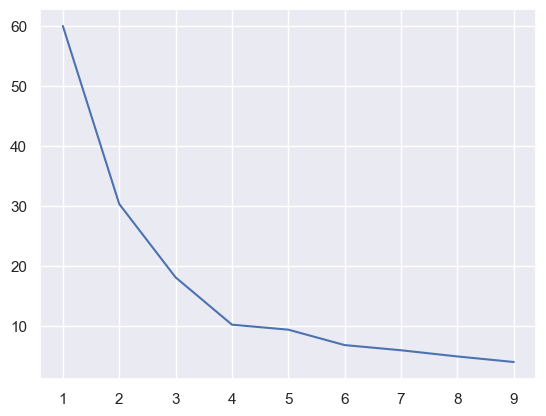

In [25]:
plt.plot(range(1,10),wcss)

## Exploring options

In [35]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusters'] = kmeans_new.fit_predict(x_scaled)


In [36]:
kmeans_new.inertia_

10.785897100946768

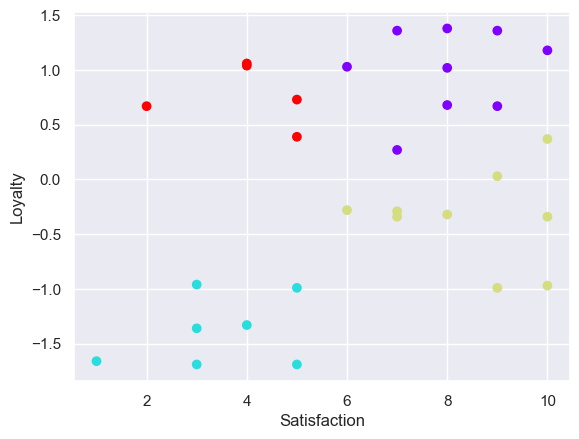

In [37]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['clusters'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()